In [23]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_excel('Data/denvau.xlsx')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        120 non-null    int64         
 1   text                           120 non-null    object        
 2   post_text                      120 non-null    object        
 3   shared_text                    6 non-null      object        
 4   original_text                  0 non-null      float64       
 5   time                           120 non-null    datetime64[ns]
 6   timestamp                      120 non-null    int64         
 7   image                          101 non-null    object        
 8   image_lowquality               120 non-null    object        
 9   images                         120 non-null    object        
 10  images_description             120 non-null    object        
 11  images_lowquality  

In [27]:
coloumn_to_drop=['shared_text','original_text','video','video_duration_seconds','video_height','video_id','video_quality','video_size_MB','video_thumbnail',
                 'video_watches','video_width','likes','link','factcheck','shared_post_id','shared_time','shared_user_id','shared_username','shared_post_url','with','sharers']
df=df.drop(coloumn_to_drop,axis=1)

In [28]:
df

post_id                                               text  \
0    890690242414434  Cô giáo chủ nhiệm dạy Văn cấp 2, người không b...   
1    888895689260556  Đen xin thông báo với cả nhà doanh thu bài hát...   
2    883117153171743  Chăm sóc chu đáo tập khách hàng này để 10 năm ...   
3    881593789990746                       Xin mời xuất trình giấy tờ 🫣   
4    880441740105951  Nơi thì nắng to nơi thì mưa lũ. Đồng âm miền T...   
..               ...                                                ...   
115  707294397420687  Xem ảnh chơi các bạn mình ơiiiii\nCảm ơn vì bu...   
116  706583560825104  Tối qua mất giọng ở Đà Nẵng. Trước khi lên sân...   
117  705096750973785  Mới nhận được kỉ niệm chương của Spotify, đăng...   
118  704973067652820  Đến Đà Nẵng phải chạy ngay ra biển hít một hơi...   
119  700526531430807  Thực sự biết ơn khán giả Quy Nhơn tối nay. Mưa...   

                                             post_text                time  \
0    Cô giáo chủ nhiệm dạy Văn cấp 2, người không b... 2023-11-20 10:10:55   
1    Đen xin thông báo với cả nhà doanh thu bài hát... 2023-11-16 22:52:10   
2    Chăm sóc chu đáo tập khách hàng này để 10 năm ... 2023-11-05 12:11:07   
3                         Xin mời xuất trình giấy tờ 🫣 2023-11-02 15:19:16   
4    Nơi thì nắng to nơi thì mưa lũ. Đồng âm miền T... 2023-10-31 10:01:12   
..                                                 ...                 ...   
115  Xem ảnh chơi các bạn mình ơiiiii\nCảm ơn vì bu... 2022-12-26 16:18:34   
116  Tối qua mất giọng ở Đà Nẵng. Trước khi lên sân... 2022-12-25 17:04:55   
117  Mới nhận được kỉ niệm chương của Spotify, đăng... 2022-12-23 19:04:36   
118  Đến Đà Nẵng phải chạy ngay ra biển hít một hơi... 2022-12-23 15:14:54   
119  Thực sự biết ơn khán giả Quy Nhơn tối nay. Mưa... 2022-12-18 01:43:20   

      timestamp                                              image  \
0    1700449855  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
1    1700149930  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
2    1699161067  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
3    1698913156  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
4    1698721272  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
..          ...                                                ...   
115  1672046314  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
116  1671962695  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
117  1671797076  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
118  1671783294  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
119  1671302600  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   

                                      image_lowquality  \
0    https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
1    https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
2    https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
3    https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
4    https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
..                                                 ...   
115  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
116  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
117  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
118  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
119  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   

                                                images  \
0    ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...   
1    ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...   
2    ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...   
3    ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...   
4    ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...   
..                                                 ...   
115  ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...   
116  ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...   
117  ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...   
118  ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...   

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        120 non-null    int64         
 1   text                           120 non-null    object        
 2   post_text                      120 non-null    object        
 3   time                           120 non-null    datetime64[ns]
 4   timestamp                      120 non-null    int64         
 5   image                          101 non-null    object        
 6   image_lowquality               120 non-null    object        
 7   images                         120 non-null    object        
 8   images_description             120 non-null    object        
 9   images_lowquality              120 non-null    object        
 10  images_lowquality_description  120 non-null    object        
 11  comments           

Text(0, 0.5, 'Số lượng comments')

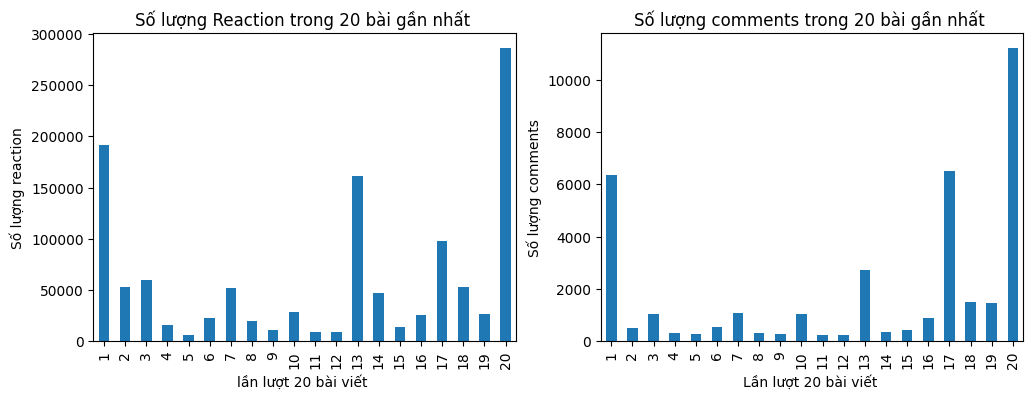

In [154]:
plt.subplot(1, 2, 1)
df20=df['reaction_count'].iloc[1:21]
df20.plot(kind='bar',figsize=(10,4))
df20=df20[::-1]
plt.title("Số lượng Reaction trong 20 bài gần nhất ")
plt.xlabel("lần lượt 20 bài viết ")
plt.ylabel("Số lượng reaction")
plt.subplot(1, 2, 2)
df20=df['comments'].iloc[1:21]
df20.plot(kind='bar',figsize=(12,4))
df20=df20[::-1]
plt.title("Số lượng comments trong 20 bài gần nhất ")
plt.xlabel("Lần lượt 20 bài viết ")
plt.ylabel("Số lượng comments")



In [31]:
df['reactions'] = df['reactions'].apply(lambda x: eval(x))
df_reactions = pd.DataFrame(df['reactions'].tolist())

In [32]:

df_reactions=pd.concat([df,df_reactions],axis=1).drop('reactions',axis=1)
df_reactions = df_reactions.fillna(0)
df_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương','shares','comments','reaction_count','time']]

post_text  thích  yêu thích  \
0    Cô giáo chủ nhiệm dạy Văn cấp 2, người không b...  86131      41909   
1    Đen xin thông báo với cả nhà doanh thu bài hát...  98295      90267   
2    Chăm sóc chu đáo tập khách hàng này để 10 năm ...  35411       8071   
3                         Xin mời xuất trình giấy tờ 🫣  39051       4002   
4    Nơi thì nắng to nơi thì mưa lũ. Đồng âm miền T...  10872       4727   
..                                                 ...    ...        ...   
115  Xem ảnh chơi các bạn mình ơiiiii\nCảm ơn vì bu...  31914      10096   
116  Tối qua mất giọng ở Đà Nẵng. Trước khi lên sân...  29962      11515   
117  Mới nhận được kỉ niệm chương của Spotify, đăng...  31447      10937   
118  Đến Đà Nẵng phải chạy ngay ra biển hít một hơi...  36761      10231   
119  Thực sự biết ơn khán giả Quy Nhơn tối nay. Mưa...  41007      17792   

      haha  wow  buồn  phẫn nộ  thương thương  shares  comments  \
0     1234   51  22.0      1.0           1181     354       909   
1       35   63   5.0      1.0           3413    3886      6343   
2     8757   24   3.0      0.0            401      65       522   
3    16420   72  87.0      4.0            177      74      1042   
4       30    5   6.0      0.0            162      24       308   
..     ...  ...   ...      ...            ...     ...       ...   
115    103   17  13.0      0.0            230      96       781   
116    213   14  25.0      1.0            289      50      1390   
117    175   35  11.0      1.0            369      36      1329   
118    254   33  46.0      1.0            272     137      2572   
119     73   26  15.0      2.0            450     182      1374   

     reaction_count                time  
0            130529 2023-11-20 10:10:55  
1            192079 2023-11-16 22:52:10  
2             52667 2023-11-05 12:11:07  
3             59813 2023-11-02 15:19:16  
4             15802 2023-10-31 10:01:12  
..              ...                 ...  
115           42373 2022-12-26 16:18:34  
116           42019 2022-12-25 17:04:55  
117           42975 2022-12-23 19:04:36  
118           47598 2022-12-23 15:14:54  
119           59365 2022-12-18 01:43:20  

[120 rows x 12 columns]

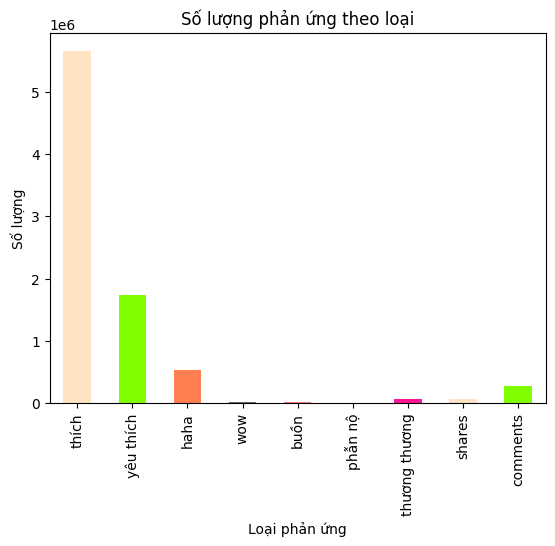

In [33]:



# Tính tổng số lượng phản ứng cho mỗi loại
reaction_counts = df_reactions[['thích','yêu thích','haha' ,'wow', 'buồn', 'phẫn nộ', 'thương thương', 'shares','comments']].sum()

# Vẽ biểu đồ cột
reaction_counts.plot(kind='bar', color=['#ffe4c4', '#7fff00', '#ff7f50', '#696969', '#f08080', '#ff4500', '#ff1493'])

# Đặt nhãn và tiêu đề
plt.title('Số lượng phản ứng theo loại')
plt.xlabel('Loại phản ứng')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()


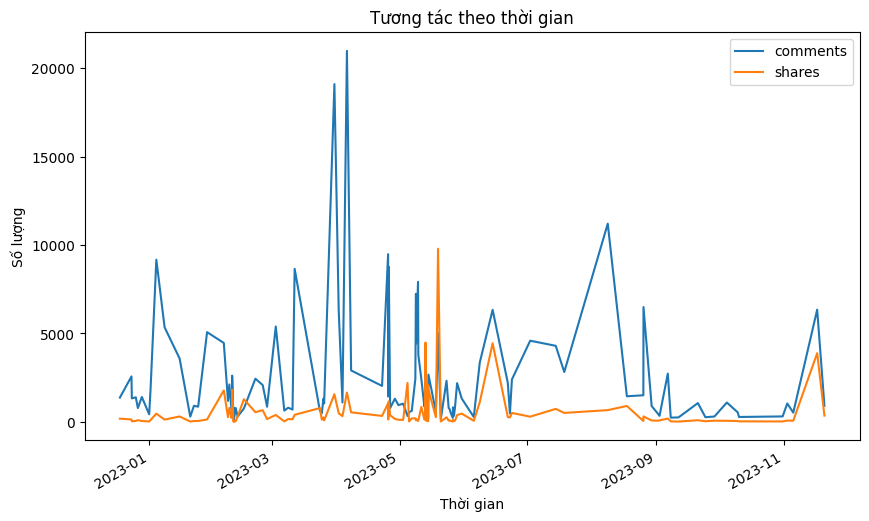

In [34]:
import matplotlib.pyplot as plt
import pandas as pd


# Đặt cột 'time' làm index
df.set_index('time', inplace=True)      

# Vẽ biểu đồ đường cho comments, shares
df[['comments','shares']].plot(kind='line', figsize=(10, 6))

# Đặt nhãn và tiêu đề
plt.title('Tương tác theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng')
plt.legend(loc='upper right')
# Hiển thị biểu đồ
plt.show()


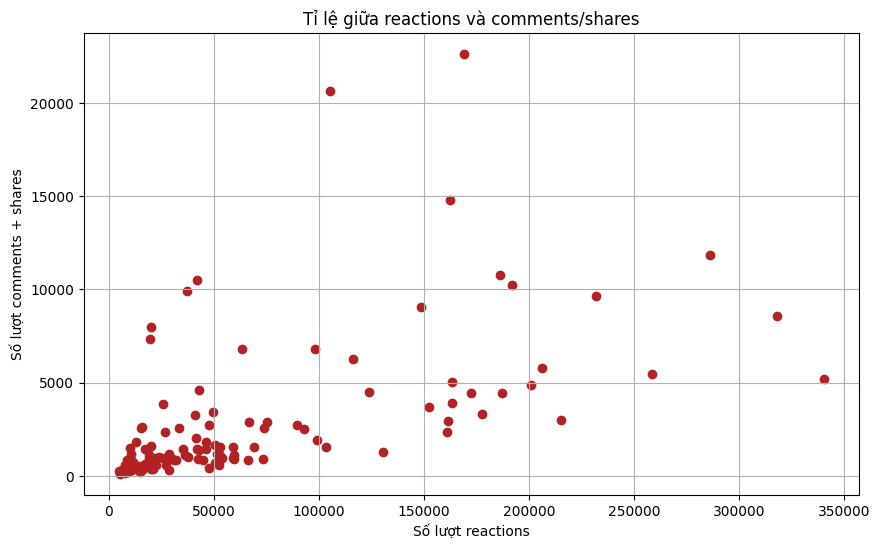

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ DataFrame
data = df_reactions

df = pd.DataFrame(data)

# Tính tổng số lượt comments và shares
df['comment_share_count'] = df['comments'] + df['shares']
df['reaction']=df['thích'] + df['yêu thích']+df['haha'] + df['wow']+df['buồn']+ df['phẫn nộ'] + df['thương thương']
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['reaction'], df['comment_share_count'], color='#b22222', alpha=1)
plt.title('Tỉ lệ giữa reactions và comments/shares')
plt.xlabel('Số lượt reactions')
plt.ylabel('Số lượt comments + shares')
plt.grid(True)
plt.show()


In [36]:
df_dulieu = pd.read_excel("Data/denvau.xlsx")

In [37]:
import pandas as pd
import matplotlib.pyplot as plt



#tổng số ảnh xuất hiện trong 120 post
df_anh = df_dulieu['image_id'].count()
df_anh

69

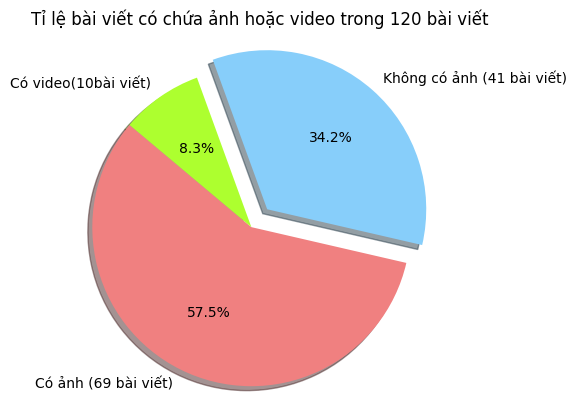

In [286]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của bạn
data = df_dulieu

df = pd.DataFrame(data)

# Tính tổng số lượng bài viết có chứa ảnh và không chứa ảnh
posts_with_photo = 69
#tổng bài viết không chứa ảnh
posts_without_photo = 120 - 69 - 10
#có video
posts_with_video = 10
#không có video 

# Vẽ biểu đồ
labels = [f'Có ảnh ({posts_with_photo} bài viết)', f'Không có ảnh ({posts_without_photo} bài viết)',f'Có video({posts_with_video}bài viết)']
sizes = [posts_with_photo, posts_without_photo,posts_with_video]
colors = ['lightcoral', 'lightskyblue','#adff2f']
kk=[0,0.15,0]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,shadow=True,explode=kk)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Tỉ lệ bài viết có chứa ảnh hoặc video trong 120 bài viết')
plt.show()


In [165]:
import pandas as pd


# Lấy ra 10 bài viết có ảnh hoặc video bất kì 
top_10_with_image = df[df['image_id'].notna()].sample(10)
top_10_without_media = df[df['image_id'].isna() & df['video_id'].isna()].sample(10)
# In thông tin về 10 bài viết có ảnh hoặc video bất kì 
print("Thông tin 10 bài viết có ảnh bất kì:")
print(top_10_with_image[['post_text', 'image_id', 'reaction_count']])

# In thông tin về 10 bài viết không chứa ảnh hay video bất kì
print("Thông tin 10 bài viết không chứa ảnh hay video:")
print(top_10_without_media[['post_text', 'image_id', 'video_id', 'reaction_count']])


Thông tin 10 bài viết có ảnh bất kì:
                                             post_text      image_id  \
78                         Một cuối tuần yên ả nhéee 🍀  7.628820e+14   
4    Nơi thì nắng to nơi thì mưa lũ. Đồng âm miền T...  8.804412e+14   
22                                   Một trời tâm sự 😁  8.234636e+14   
98   "Luôn yêu đời" ở mọi nơi: https://denvau.lnk.t...  7.373961e+14   
112                                  Sao rét thế nhỉ 🥶  7.116753e+14   
14   Chào mừng quốc khánh Việt Nam 2/9. Chúc cả nhà...  8.478596e+14   
103  Luôn yêu đời (teaser)\n😘🍀🤟 https://denvau.lnk....  7.357093e+14   
94   "Luôn yêu đời” trên Nhaccuatui ở đây nha cả nh...  7.375825e+14   
17                                Làm về chưa mấy bạn?  8.440979e+14   
110          Vừa đi phượt được 500m thì dính cơn mưa 🥲  7.159026e+14   

     reaction_count  
78            69169  
4             15802  
22           163560  
98            16026  
112           99408  
14            47636  
103           35

In [273]:
df['image_id'].info

<bound method Series.info of 0      8.906827e+14
1               NaN
2      8.831168e+14
3      8.815935e+14
4      8.804412e+14
           ...     
115             NaN
116             NaN
117    7.050917e+14
118    7.049706e+14
119             NaN
Name: image_id, Length: 120, dtype: float64>

In [279]:
df['image_id'].fillna(0)

0      8.906827e+14
1      0.000000e+00
2      8.831168e+14
3      8.815935e+14
4      8.804412e+14
           ...     
115    0.000000e+00
116    0.000000e+00
117    7.050917e+14
118    7.049706e+14
119    0.000000e+00
Name: image_id, Length: 120, dtype: float64

In [275]:
df['image_id'][df['image_id']== None ].count()

0

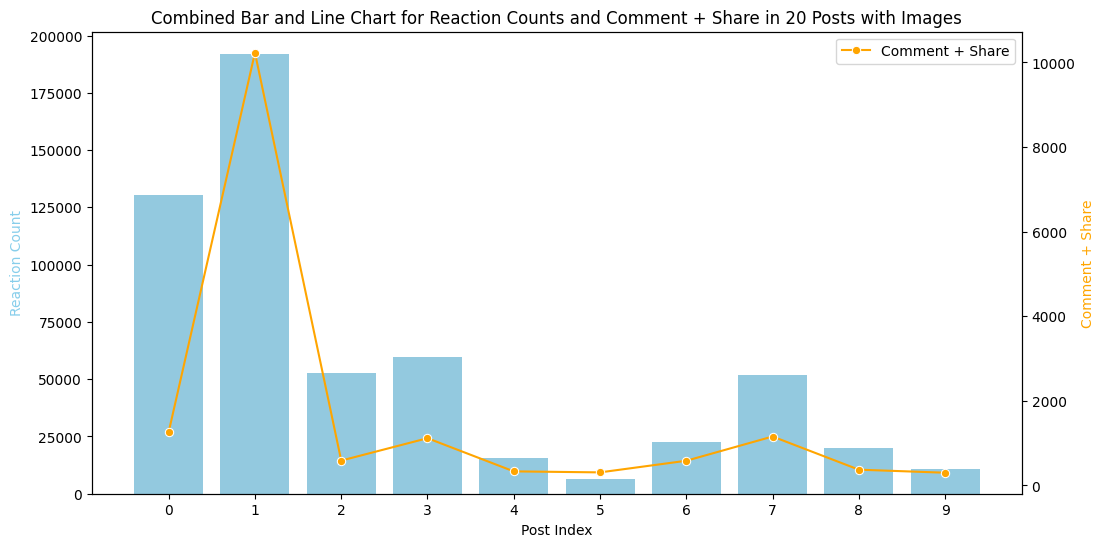

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy 20 bài viết có ảnh bất kỳ từ DataFrame
posts_with_images = df[df['image_id'] !=0 ].iloc[:10]

# Tạo figure và axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ cột trên axes1
sns.barplot(x=posts_with_images.index, y='reaction_count', data=posts_with_images, ax=ax1, color='skyblue')

# Tạo axes thứ hai để vẽ biểu đồ đường
ax2 = ax1.twinx()

# Tính tổng comment và share và thêm vào DataFrame
posts_with_images['comment_share'] = posts_with_images['comments'] + posts_with_images['shares']

# Vẽ biểu đồ đường trên axes2
sns.lineplot(x=posts_with_images.index, y='comment_share', data=posts_with_images, ax=ax2, color='orange', marker='o', label='Comment + Share')

# Tạo định dạng và tiêu đề
ax1.set_xlabel('Post Index')
ax1.set_ylabel('Reaction Count', color='skyblue')
ax2.set_ylabel('Comment + Share', color='orange')
plt.title("Combined Bar and Line Chart for Reaction Counts and Comment + Share in 20 Posts with Images")

# Hiển thị biểu đồ
plt.show()


In [294]:

df['image_id'].fillna(0,inplace=True)
df['image_id'].info

<bound method Series.info of 0      8.906827e+14
1      0.000000e+00
2      8.831168e+14
3      8.815935e+14
4      8.804412e+14
           ...     
115    0.000000e+00
116    0.000000e+00
117    7.050917e+14
118    7.049706e+14
119    0.000000e+00
Name: image_id, Length: 120, dtype: float64>

In [295]:
df['image_id'] = pd.to_numeric(df['image_id'], errors='coerce').astype('int64')

In [296]:
df['image_id'].info

<bound method Series.info of 0      890682699081855
1                    0
2      883116759838449
3      881593483324110
4      880441206772671
            ...       
115                  0
116                  0
117    705091657640961
118    704970640986396
119                  0
Name: image_id, Length: 120, dtype: int64>

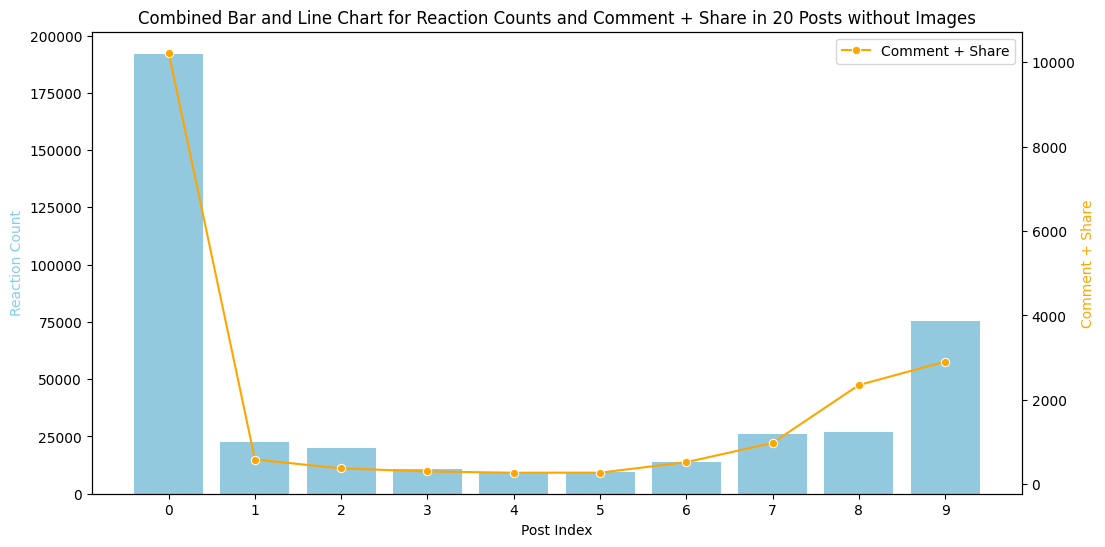

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy 20 bài viết có ảnh bất kỳ từ DataFrame

posts_without_images = df[df['image_id'] == 0].iloc[:10]
posts_without_images.reset_index(drop=True, inplace=True)
# Tạo figure và axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ cột trên axes1
sns.barplot(x=posts_without_images.index, y='reaction_count', data=posts_without_images, ax=ax1, color='skyblue')

# Tạo axes thứ hai để vẽ biểu đồ đường
ax2 = ax1.twinx()

# Tính tổng comment và share và thêm vào DataFrame
posts_without_images['comment_share'] = posts_without_images['comments'] + posts_without_images['shares']

# Vẽ biểu đồ đường trên axes2
sns.lineplot(x=posts_without_images.index, y='comment_share', data=posts_without_images, ax=ax2, color='orange', marker='o', label='Comment + Share')

# Tạo định dạng và tiêu đề
ax1.set_xlabel('Post Index')
ax1.set_ylabel('Reaction Count', color='skyblue')
ax2.set_ylabel('Comment + Share', color='orange')
plt.title("Combined Bar and Line Chart for Reaction Counts and Comment + Share in 20 Posts without Images")

# Hiển thị biểu đồ
plt.show()


In [309]:
posts_without_images

post_id                                               text  \
1   888895689260556  Đen xin thông báo với cả nhà doanh thu bài hát...   
6   867995848017207         Trông sáng sủa hẳn 🫣\n…\n📸 Ekip An Concert   
8   862143128602479  Cùng VietinBank trao những món quà đầy ắp niềm...   
9   859768042173321  Cơn mưa đêm qua chỉ khiến chúng ta gần nhau th...   
11  852580356225423  Band nhạc Màu Nước và Đen tối qua đã được tiếp...   
12  850532419763550  Cao đẳng FPT Đà Nẵng tối qua cháy dã man luôn ...   
15  847515600065232  Cảm ơn vì những cánh tay dành cho Đen và Màu N...   
16  846002533549872  Có việc làm mừng quá Đồng âm ơiiii 😘 Cảm ơn cá...   
19  840296687453790  Cùng nhìn lại sơ lược những gì đã làm cùng nha...   
24  811826626967463  Cuộc sống này ngày càng tròng trành\nNên mới c...   

                                            post_text shared_text  \
1   Đen xin thông báo với cả nhà doanh thu bài hát...         NaN   
6          Trông sáng sủa hẳn 🫣\n…\n📸 Ekip An Concert         NaN   
8   Cùng VietinBank trao những món quà đầy ắp niềm...         NaN   
9   Cơn mưa đêm qua chỉ khiến chúng ta gần nhau th...         NaN   
11  Band nhạc Màu Nước và Đen tối qua đã được tiếp...         NaN   
12  Cao đẳng FPT Đà Nẵng tối qua cháy dã man luôn ...         NaN   
15  Cảm ơn vì những cánh tay dành cho Đen và Màu N...         NaN   
16  Có việc làm mừng quá Đồng âm ơiiii 😘 Cảm ơn cá...         NaN   
19  Cùng nhìn lại sơ lược những gì đã làm cùng nha...         NaN   
24  Cuộc sống này ngày càng tròng trành\nNên mới c...         NaN   

    original_text                time   timestamp  \
1             NaN 2023-11-16 22:52:10  1700149930   
6             NaN 2023-10-09 22:06:04  1696863964   
8             NaN 2023-09-28 18:10:44  1695899444   
9             NaN 2023-09-24 10:34:24  1695526464   
11            NaN 2023-09-11 13:33:30  1694414010   
12            NaN 2023-09-07 20:12:16  1694092336   
15            NaN 2023-09-01 18:26:13  1693567573   
16            NaN 2023-08-29 16:40:22  1693302022   
19            NaN 2023-08-17 20:00:45  1692277245   
24            NaN 2023-06-23 18:58:41  1687521521   

                                                image  \
1   https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
6   https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
8   https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
9   https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
11  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
12  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
15  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
16  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
19                                                NaN   
24  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   

                                     image_lowquality  \
1   https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
6   https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
8   https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
9   https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
11  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
12  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
15  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
16  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
19  https://scontent.fhan17-1.fna.fbcdn.net/v/t15....   
24  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   

                                               images  ...  \
1   ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...  ...   
6   ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...  ...   
8   ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...  ...   
9   ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...  ...   
11  ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...  ...   
12  ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...  ...   
15  ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...  ...   
16  ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...  ...   
19                                     

In [315]:
pip install wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


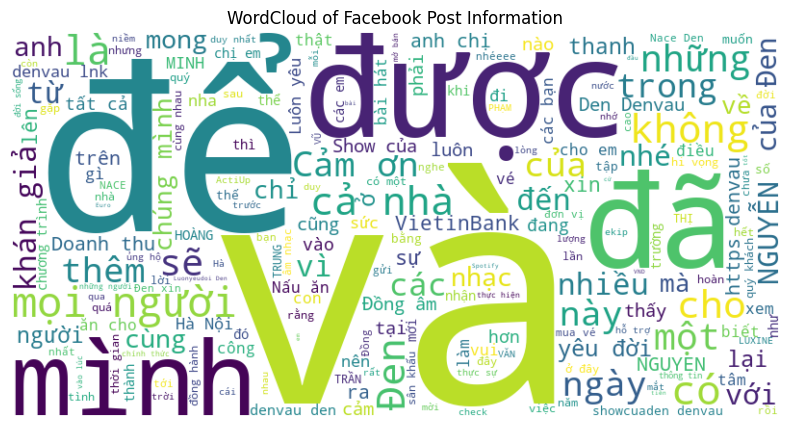

In [316]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tạo một chuỗi từ thông tin của bài post (có thể thay đổi cột nếu cần)
text = ' '.join(df['post_text'].astype(str))

# Tạo WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Hiển thị WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Facebook Post Information')
plt.show()


In [333]:
df = pd.read_excel("Data/denvau.xlsx")

In [334]:
import re
import datetime
def get_comments(text):
    pattern = r"{[^{}]*}"
    matches = re.findall(pattern, text)
    result = [eval(match) for match in matches]
    return result

In [335]:
def creatCommentsFrame(df):
    df_result = {"comment_id" : [],
                 "commenter_id" : [],
                   "comment_text" : [],
                   "commenter_name" : [],
                   "post_id" : []}

    new_df = df[~df["comments_full"].isna()]
    for index, rows in new_df.iterrows():
        x = rows["comments_full"]
        for comment in get_comments(x):
            try:
                print(comment)
                df_result['comment_id'].append(comment['comment_id'])
                df_result['commenter_id'].append(comment['commenter_id'])
                df_result['comment_text'].append(comment['comment_text'])
                df_result['commenter_name'].append(comment['commenter_name'])
                df_result['post_id'].append(rows.post_id)
            except Exception as e:
              print(f"Error processing comment: {e}")
              continue
    return pd.DataFrame(df_result)

In [336]:
df_cmt = creatCommentsFrame(df)
df_cmt

{'name': 'Dương Tú', 'link': 'https://facebook.com/duong.tu.1675?eav=AfaIj97nuAEE0xpF_wzeUPH7fKzplklMWPrc8wKah8Ag__7-lmRreVUZcRiziG6xbXk&fref=pb&paipv=0', 'type': 'like'}
Error processing comment: 'comment_id'
{'like': 1}
Error processing comment: 'comment_id'
{'name': 'Lê Ngọc Thắng', 'link': 'https://facebook.com/le.kingley?eav=AfaUF2ctJbR9hdjeIQQ1cnTuQiQ9FGhhvAi7Y0pml1YAo2RVQGKzdebL3_LtfEBVUeo&fref=pb&paipv=0', 'type': 'haha'}
Error processing comment: 'comment_id'
{'name': 'Tuấn Anh Nguyễn', 'link': 'https://facebook.com/profile.php?id=100007001055707&eav=AfZCqmy-0_5Bs6SBqOs-cZijYNG1SbqGN18BNQzpDsK17J_p4XO1curK-q0SBep2Czc&fref=pb&paipv=0', 'type': 'haha'}
Error processing comment: 'comment_id'
{'haha': 2}
Error processing comment: 'comment_id'
{'name': 'Tan Pham', 'link': 'https://facebook.com/pham.ngoctan.75?eav=AfbElYBnRtPiC86qKPmU_y1tENl6AtFGCgLxFuUDsCOaEgJNJ0u_gYvhZBHs6S5c4-o&fref=pb&paipv=0', 'type': 'like'}
Error processing comment: 'comment_id'
{'like': 1}
Error processing c

comment_id     commenter_id  \
0     1067560734664047  100075940975703   
1      730049968454084  100001600751614   
2      314620638092925  100081131793257   
3      364093452738285  100028884424807   
4      308793792036580  100015326027033   
...                ...              ...   
3851   601163251813016  100040544659438   
3852   973762736940395  100006162214621   
3853   566837711945544  100036722742648   
3854   711112930647603  100012614569057   
3855   761424385692535  100010449813141   

                                           comment_text  \
0                   bài văn này cô chấm 10₫ nha chú Đen   
1     Lê Thanh Huyền học trò như này thì thầy cô nào...   
2                                  Một lời chúc sâu sắc   
3                                               Đen Vâu   
4     Thực sự cứ đến ngày này là nhớ thầy cô muốn qu...   
...                                                 ...   
3851                               Chú thật tuyệt vời 🥰   
3852                       Qua mưa quá trời luôn chú ơi   
3853                               Cháy quá chú ơiiiiii   
3854                               Cháy quá chú đen ơi🥰   
3855                                      Quá tuyệt vời   

                                         commenter_name          post_id  
0                                              Trần Hoa  890690242414434  
1                                                Lưu Ba  890690242414434  
2     Trần hướng Hair Academy - Tạo Mẫu Tóc Chuyên N...  890690242414434  
3                                               Mạnh Lê  890690242414434  
4                                             Minh Huấn  890690242414434  
...                                                 ...              ...  
3851                                            Lynh Na  700526531430807  
3852                                     Phương Minh Vũ  700526531430807  
3853                                       Võ Thái Bình  700526531430807  
3854                                        Võ Phi Hùng  700526531430807  
3855                                           Kim Ngân  700526531430807  

[3856 rows x 5 columns]

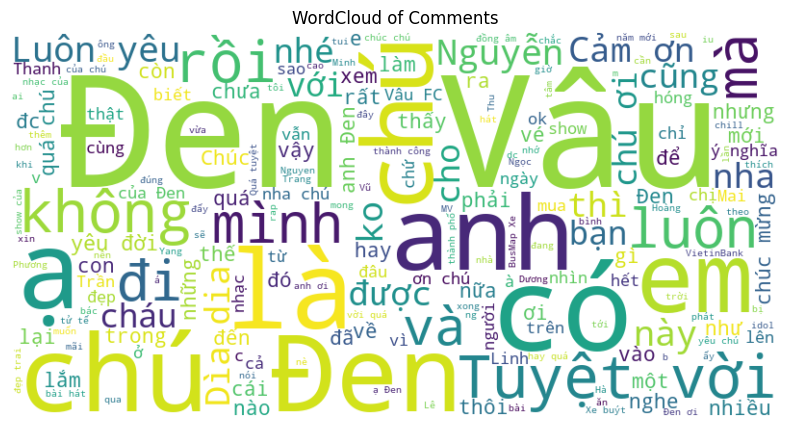

In [367]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
# Concatenate all comments into a single string
all_comments = ' '.join(df_cmt['comment_text'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Display the WordCloud image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Comments')
plt.show()

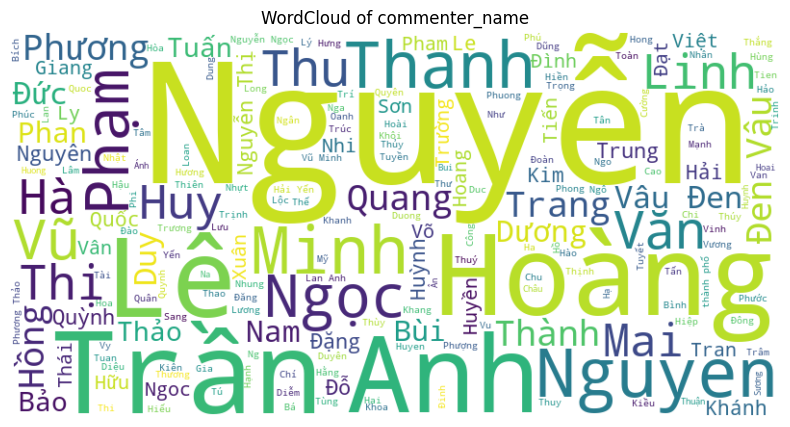

In [369]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
# Concatenate all comments into a single string
all_comments = ' '.join(df_cmt['commenter_name'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Display the WordCloud image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of commenter_name')
plt.show()